In [1]:
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from algos import reconstruct, reconstruct_1bit
from utils import sign, show_unit_ball

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data


# Load image
original = pywt.data.camera()

In [4]:
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
x_0 = np.zeros_like(original)
x_0[:256, :256] = LL
x_0[:256, 256:] = LH
x_0[256:, :256] = HL
x_0[:256, :256] = HH

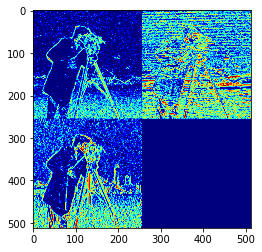

In [5]:
plt.imshow(x_0, cmap="jet")

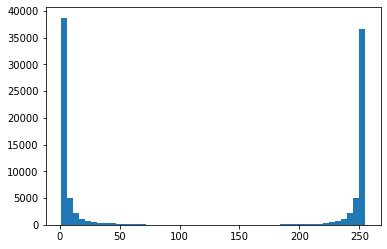

In [6]:
plt.hist(x_0[x_0 > 0], bins=50)
plt.show()

In [11]:
# Parameters

n = x_0.ravel().shape[0]
m = 100

In [12]:
# Generate sensing matrix
A = np.random.randn(m, n)

In [13]:
# Compute y
y = sign(A.dot(x_0.ravel()))

In [ ]:
xx = reconstruct_1bit(y, A)

In [ ]:
xx = xx.reshape((512, 512))
LL_i = xx[:256, :256]
LH_i = x_0[:256, 256:]
HL_i = x_0[256:, :256]
HH_i = x_0[:256, :256]

In [ ]:
x_re = pywt.idwt2((LL_i, (LH_i, HL_i, HH_i)), 'haar')

In [ ]:
show_unit_ball(xx)

In [23]:
xx_cs = reconstruct(y, A)

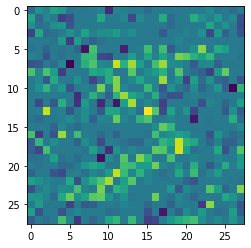

In [24]:
show_unit_ball(xx_cs)